<a href="https://colab.research.google.com/github/iamgj01/Practice_Python/blob/main/Youtubers_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import warnings
warnings.filterwarnings("ignore")

Data Exploration:
- Start by exploring the dataset to understand its structure and identify key variables.
- Check for missing data and outliers.

In [3]:
df = pd.read_csv('/content/youtubers_df.csv')

In [4]:
df = df.rename(columns={'Suscribers': 'Subscribers'})

In [5]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Username     1000 non-null   object 
 2   Categories   694 non-null    object 
 3   Subscribers  1000 non-null   float64
 4   Country      1000 non-null   object 
 5   Visits       1000 non-null   float64
 6   Likes        1000 non-null   float64
 7   Comments     1000 non-null   float64
 8   Links        1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Rank,Subscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [8]:
df.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [9]:
df.drop_duplicates('Username', inplace = True)
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [10]:
df.shape

(994, 9)

In [11]:
df.fillna('entretenimiento',inplace=True)

In [12]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,entretenimiento,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [13]:
df.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [14]:
df = df.drop(['Links'], axis=1)

In [15]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,entretenimiento,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0


In [16]:
df.corr()

,Rank,Subscribers,Visits,Likes,Comments
Rank,1.000000,-0.636772,-0.102388,-0.090573,-0.048749
Subscribers,-0.636772,1.000000,0.244950,0.211396,0.035985
Visits,-0.102388,0.244950,1.000000,0.950461,0.323924
Likes,-0.090573,0.211396,0.950461,1.000000,0.325785
Comments,-0.048749,0.035985,0.323924,0.325785,1.000000


<Axes: >

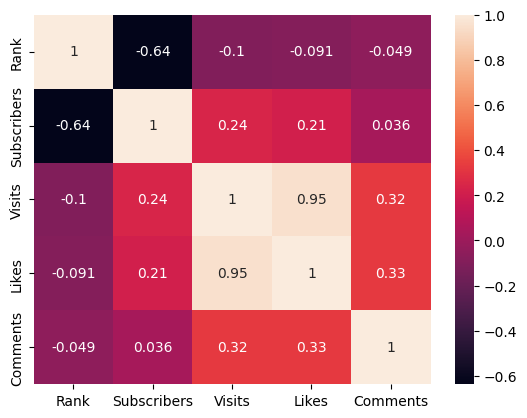

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
df['Categories'].nunique()

46

Trend Analysis:
- Identify trends among the top YouTube streamers. Which categories are the most popular?
- Is there a correlation between the number of subscribers and the number of likes or comments?

In [19]:
# Top YouTube Streamers:
top_streamers = df.sort_values(by='Subscribers', ascending=False).head(10)
top_streamers

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,entretenimiento,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0


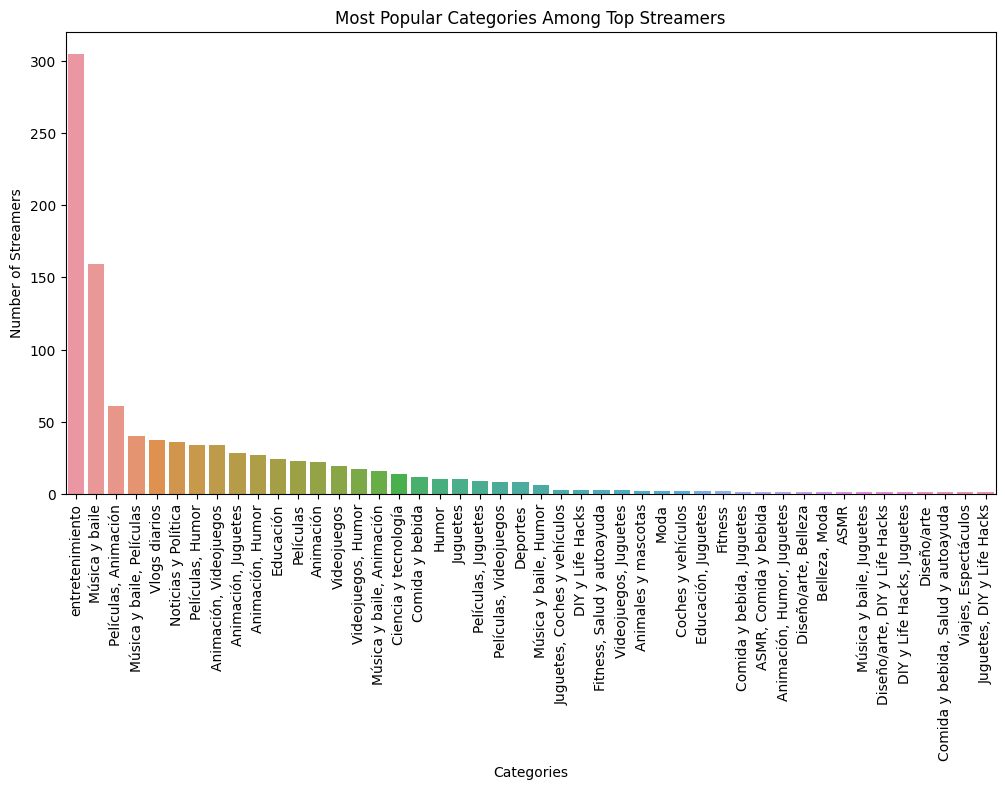

In [20]:
# Most Popular Categories:
category_counts = df['Categories'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Most Popular Categories Among Top Streamers')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

In [21]:
# Correlation Analysis:
correlation_likes = df['Subscribers'].corr(df['Likes'])
correlation_comments = df['Subscribers'].corr(df['Comments'])

print(f'Correlation between Subscribers and Likes: {correlation_likes:.3f}')
print(f'Correlation between Subscribers and Comments: {correlation_comments:.3f}')

Correlation between Subscribers and Likes: 0.211
Correlation between Subscribers and Comments: 0.036


In [22]:
#Visualize the correlations:
#plt.figure(figsize=(10, 5))
#plt.subplot(1, 2, 1)
#sns.scatterplot(df=top_streamers, y='Subscribers', x='Likes')
#plt.title('Subscribers vs. Likes')

#plt.subplot(1, 2, 2)
#sns.scatterplot(df=top_streamers, y='Subscribers', x='Comments')
#plt.title('Subscribers vs. Comments')

#plt.tight_layout()
#plt.show()

Audience Study:
- Analyze the distribution of streamers' audiences by country.

> Are there regional preferences for specific content categories?



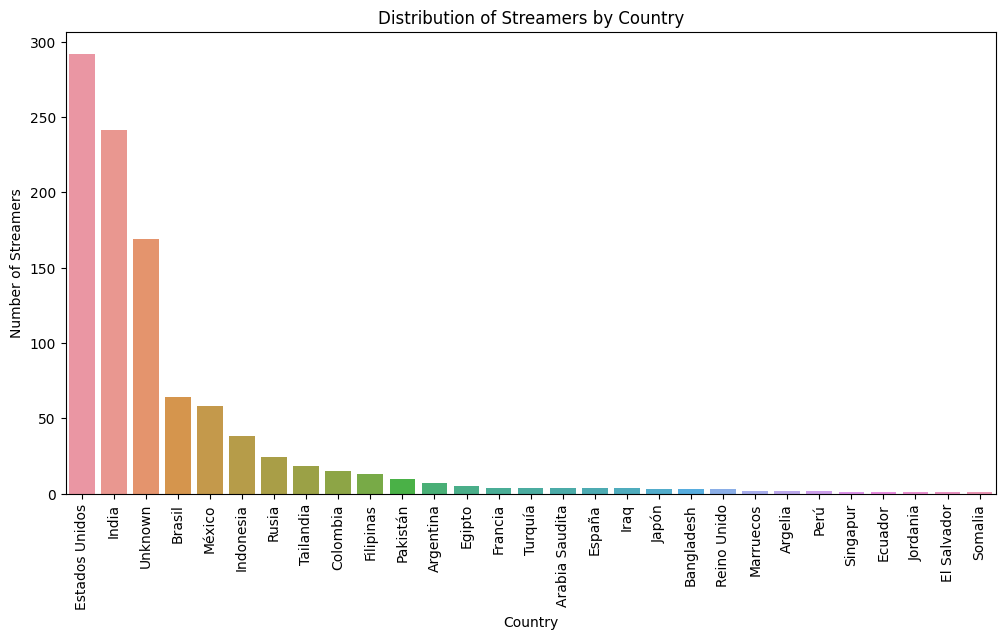

In [23]:
# 1. Distribution of Streamers by Country

country_counts = df['Country'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribution of Streamers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

In [24]:
# 2. Regional Preferences for Content Categories

category_counts = df.groupby(['Country', 'Categories'])['Username'].count().unstack().fillna(0)

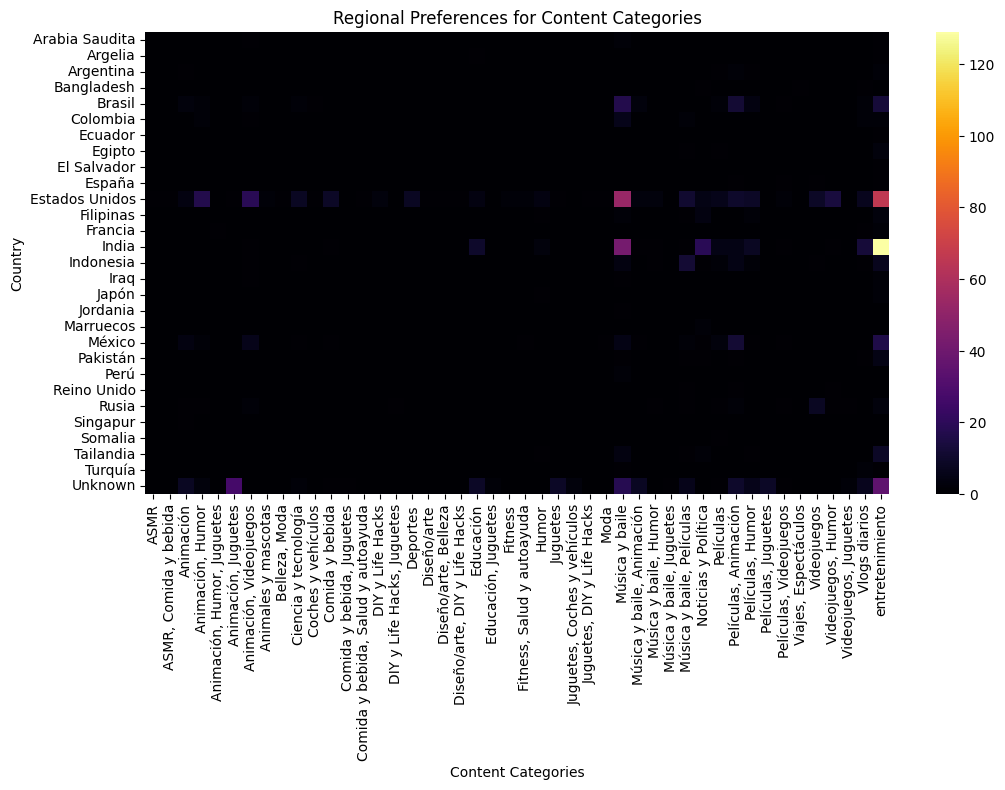

In [25]:
# 3. Visualizing Regional Preferences

plt.figure(figsize=(12, 6))
sns.heatmap(category_counts, cmap="inferno")
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Country')
plt.show()

Performance Metrics:
- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [26]:
#Calculate Average Metrics:
average_subscribers = df['Subscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

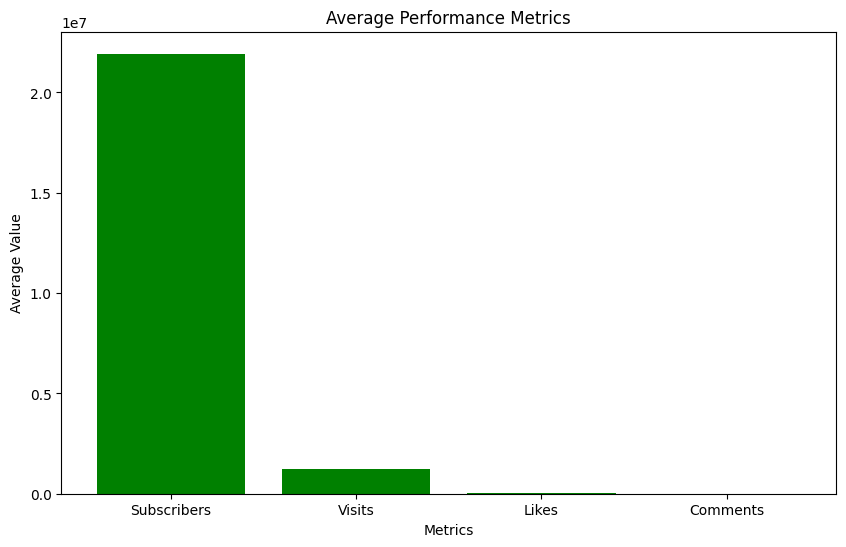

In [27]:
# Visualize the Averages:
metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
averages = [average_subscribers, average_visits, average_likes, average_comments]

plt.figure(figsize=(10, 6))
plt.bar(metrics, averages, color='g')
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()

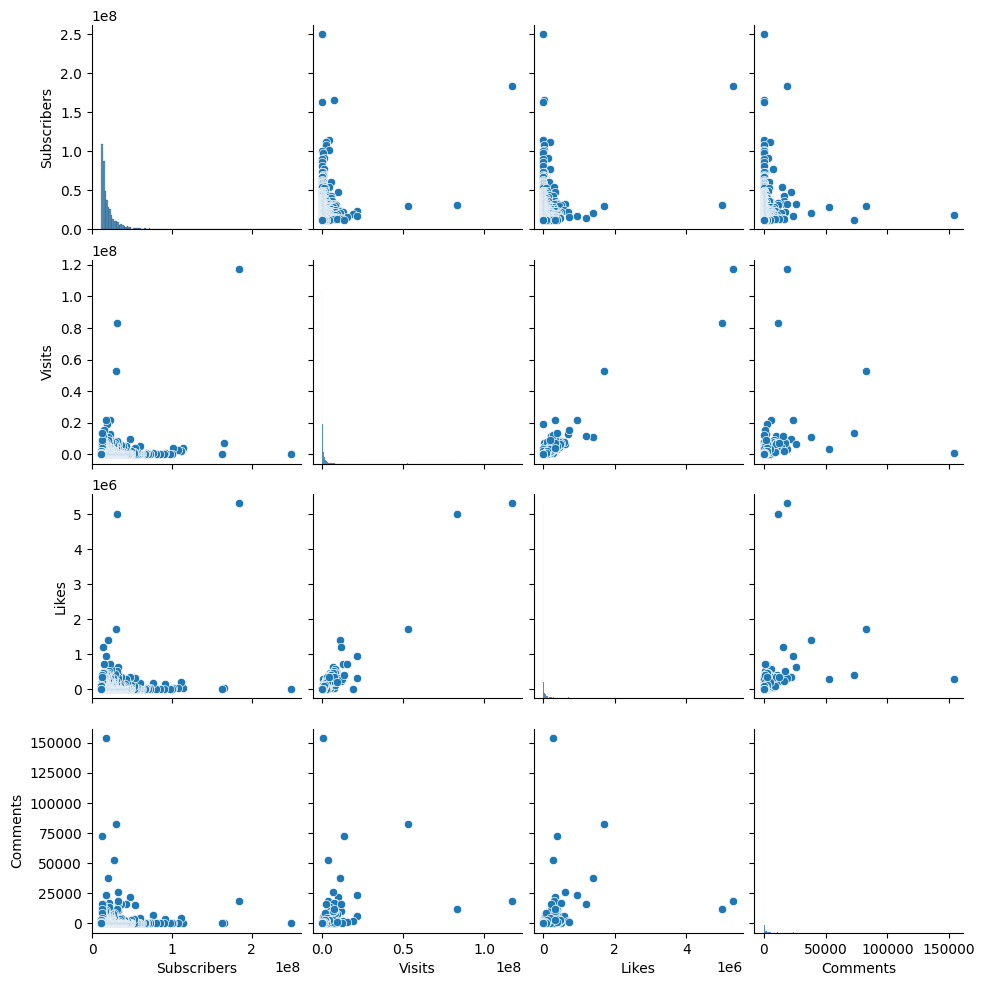

In [28]:
#Pairplot: Visualize pairwise relationships between metrics
sns.pairplot(df[metrics])
plt.show()

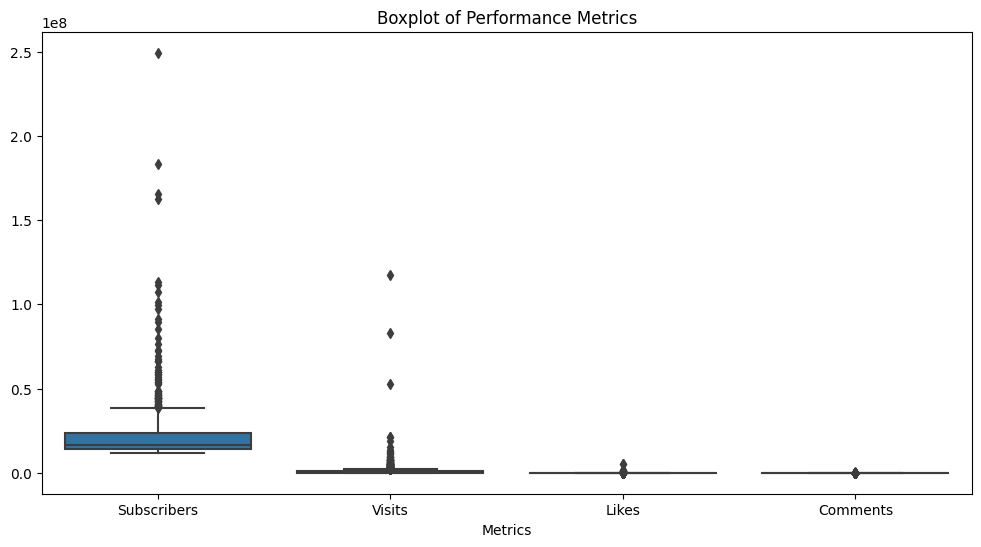

In [29]:
# Boxplots: Visualize the distribution and potential outliers for each metric
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[metrics])
plt.title('Boxplot of Performance Metrics')
plt.xlabel('Metrics')
plt.show()

In [30]:
#For example, to detect potential outliers in 'subscribers' column:
Q1 = df['Subscribers'].quantile(0.25)
Q3 = df['Subscribers'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Subscribers'] < lower_bound) | (df['Subscribers'] > upper_bound)]
print("Potential Outliers in Subscribers:")
print(outliers)

Potential Outliers in Subscribers:
    Rank         Username           Categories  Subscribers         Country  \
0      1          tseries       Música y baile  249500000.0           India   
1      2          MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2      3        CoComelon            Educación  165500000.0         Unknown   
3      4         SETIndia      entretenimiento  162600000.0           India   
4      5    KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   
..   ...              ...                  ...          ...             ...   
74    75       gr6explode       Música y baile   39300000.0          Brasil   
75    76             TEDx      entretenimiento   39100000.0  Estados Unidos   
76    77  GaaneSuneAnsune       Música y baile   39100000.0           India   
77    78           shfa-1        Vlogs diarios   39100000.0         Francia   
78    79      vladvaniki1     Películas, Humor   38700000.0         Unknown   

         Visits 

Content Categories:
- Explore the distribution of content categories. Which categories have the highest number of
streamers?
- Are there specific categories with exceptional performance metrics?

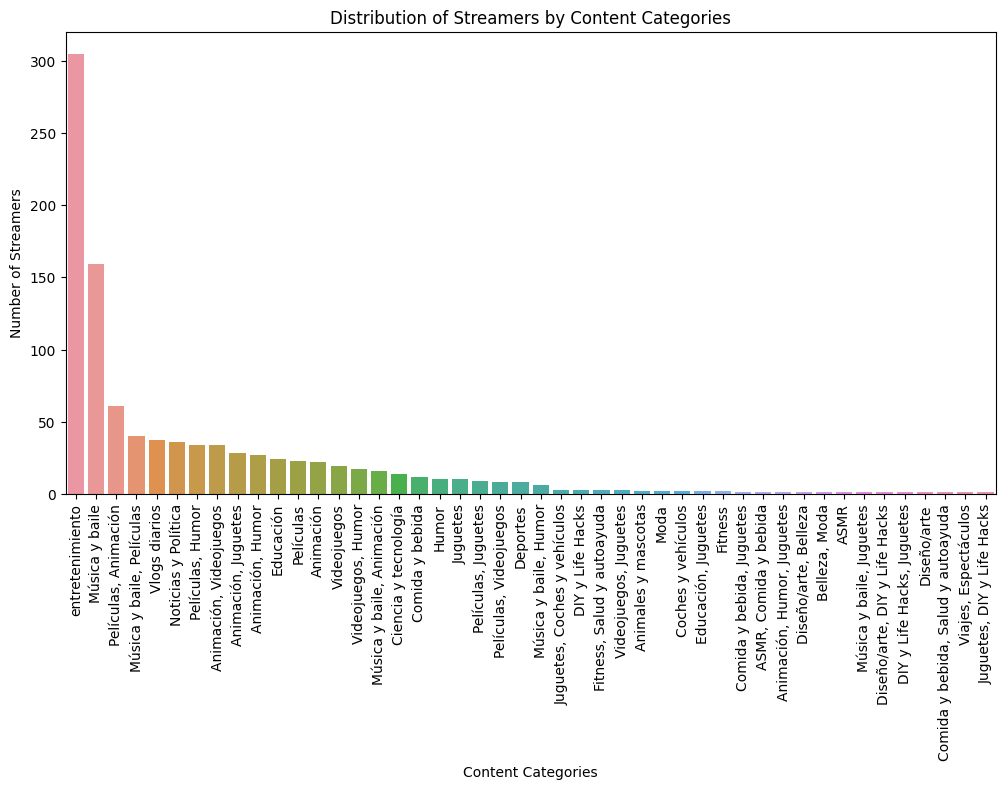

In [31]:
#Distribution of Content Categories:
category_counts = df['Categories'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Streamers by Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

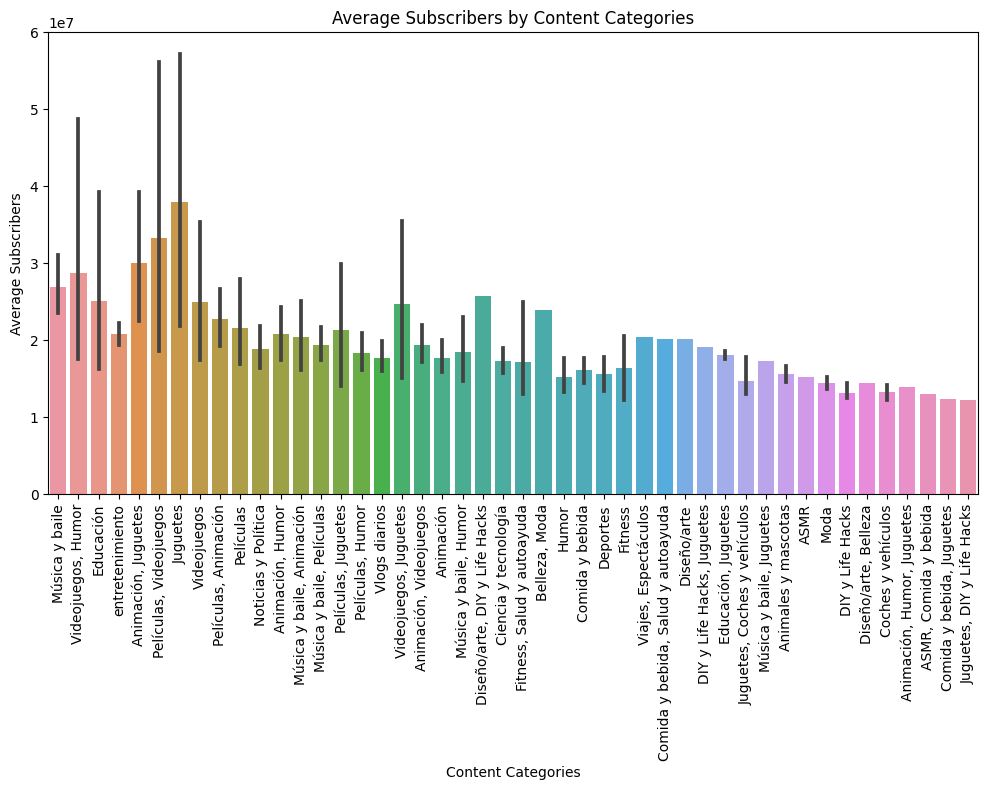

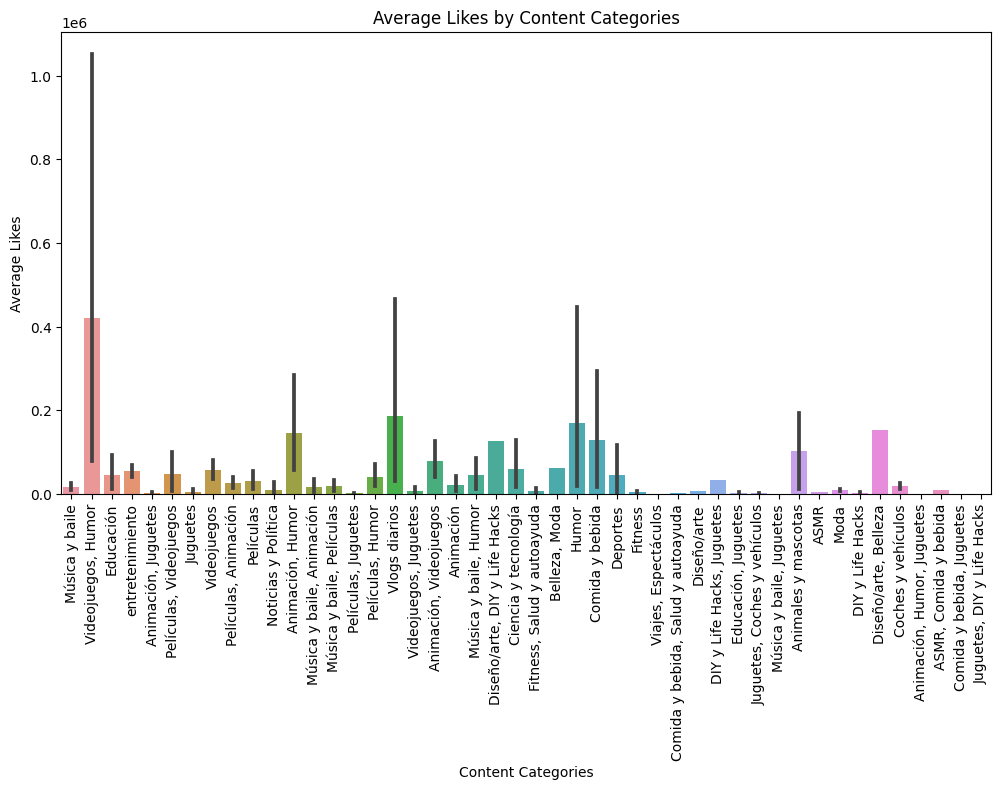

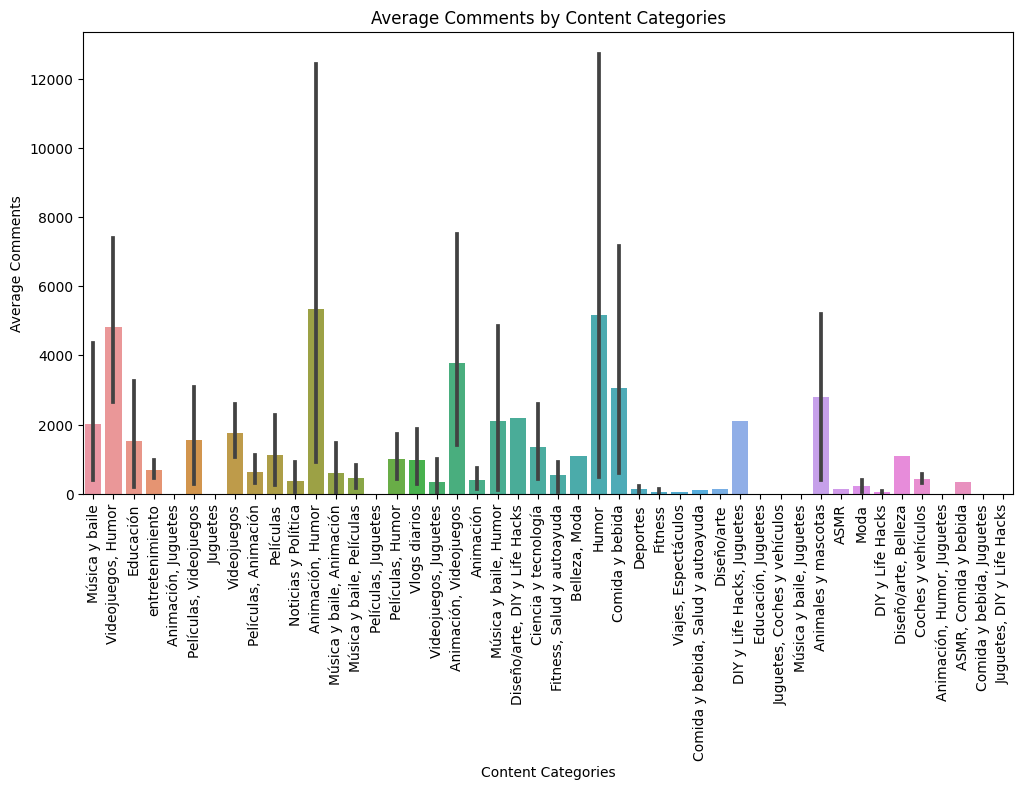

In [32]:
# Performance Metrics by Category
# Calculate and visualize average performance metrics by category
performance_metrics = ['Subscribers', 'Likes', 'Comments']

for metric in performance_metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Categories', y=metric)
    plt.title(f'Average {metric.capitalize()} by Content Categories')
    plt.xlabel('Content Categories')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=90)
    plt.show()

In [33]:
# To identify exceptional categories, you can calculate z-scores or other statistical measures and filter based on thresholds.
# Here's an example using z-scores:

for metric in performance_metrics:
    z_scores = (df[metric] - df[metric].mean()) / df[metric].std()  # (z_score = (x - xbar/std))
    exceptional_categories = df[z_scores.abs() > 2]['Categories'].unique()
    print(f'Exceptional Categories for {metric.capitalize()}: {", ".join(exceptional_categories)}')

Exceptional Categories for Subscribers: Música y baile, Videojuegos, Humor, Educación, entretenimiento, Animación, Juguetes, Películas, Videojuegos, Juguetes, Videojuegos, Películas, Animación, Películas, Noticias y Política
Exceptional Categories for Likes: Videojuegos, Humor, entretenimiento, Vlogs diarios, Animación, Humor, Animación, Videojuegos, Humor, Comida y bebida
Exceptional Categories for Comments: Videojuegos, Humor, Música y baile, Animación, Humor, entretenimiento, Animación, Videojuegos, Educación, Humor, Comida y bebida


Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
marketing campaigns.

In [34]:
# Define High Performance Metrics
high_subs_threshold = df['Subscribers'].quantile(0.75, interpolation="nearest")
high_likes_threshold = df['Likes'].quantile(0.75, interpolation="nearest")
high_comments_threshold = df['Comments'].quantile(0.75, interpolation="nearest")

In [35]:
# Identify High-Performance Streamers
df['HighPerformance'] = ((df['Subscribers'] >= high_subs_threshold) &
                           (df['Likes'] >= high_likes_threshold) &
                           (df['Comments'] >= high_comments_threshold))

In [36]:
# Analyze Engagement with Brands or Marketing Campaigns:
df['Engagement'] = df['Likes'] + df['Comments']

high_performance_engagement = df[df['HighPerformance']]['Engagement'].sum()
low_performance_engagement = df[~df['HighPerformance']]['Engagement'].sum()

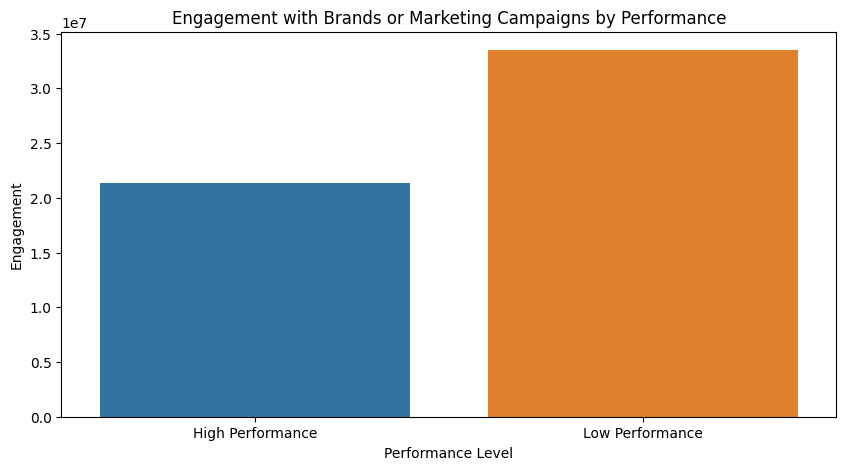

In [37]:
# Visualize the results:
plt.figure(figsize=(10, 5))
sns.barplot(x=['High Performance', 'Low Performance'], y=[high_performance_engagement, low_performance_engagement])
plt.title('Engagement with Brands or Marketing Campaigns by Performance')
plt.xlabel('Performance Level')
plt.ylabel('Engagement')
plt.show()

In [38]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,HighPerformance,Engagement
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,False,2778.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,True,5318500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,False,24700.0
3,4,SETIndia,entretenimiento,162600000.0,India,15600.0,166.0,9.0,False,175.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,False,12400.0


Benchmarking:
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [39]:
# Identify Top-Performing Streamers:
df['AboveAvgSubscribers'] = df['Subscribers'] > average_subscribers
df['AboveAvgVisits'] = df['Visits'] > average_visits
df['AboveAvgLikes'] = df['Likes'] > average_likes
df['AboveAvgComments'] = df['Comments'] > average_comments

In [40]:
# List the Top-Performing Content Creators:
top_performing_streamers = df[df['AboveAvgSubscribers'] & df['AboveAvgVisits'] & df['AboveAvgLikes'] & df['AboveAvgComments']]
print(top_performing_streamers)

     Rank               Username                     Categories  Subscribers  \
1       2                MrBeast             Videojuegos, Humor  183500000.0   
5       6              PewDiePie         Películas, Videojuegos  111500000.0   
26     27            dudeperfect                    Videojuegos   59700000.0   
34     35            TaylorSwift                 Música y baile   54100000.0   
39     40            JuegaGerman           Películas, Animación   48600000.0   
43     44               A4a4a4a4               Animación, Humor   47300000.0   
58     59              Mikecrack           Películas, Animación   43400000.0   
62     63         KimberlyLoaiza                 Música y baile   42100000.0   
64     65        luisitocomunica                entretenimiento   41100000.0   
70     71            JessNoLimit           Películas, Animación   39600000.0   
96     97         TotalGaming093         Películas, Videojuegos   36300000.0   
98     99   TechnoGamerzOfficial        

Content Recommendations:
- Propose a system for enhancing content recommendations to YouTube users based on streamers'categories and performance metrics.

In [41]:
# Create a user-item interaction matrix with content categories and performance metrics
user_item_matrix = df.pivot_table(index='Username', columns='Categories', values='Subscribers', fill_value=0)
user_item_matrix

Categories,ASMR,"ASMR, Comida y bebida",Animación,"Animación, Humor","Animación, Humor, Juguetes","Animación, Juguetes","Animación, Videojuegos",Animales y mascotas,"Belleza, Moda",Ciencia y tecnología,...,"Películas, Animación","Películas, Humor","Películas, Juguetes","Películas, Videojuegos","Viajes, Espectáculos",Videojuegos,"Videojuegos, Humor","Videojuegos, Juguetes",Vlogs diarios,entretenimiento
Username,,,,,,,,,,,,,,,,,,,,,
-genevievesplayhouse1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GOSpanish,0,0,13900000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123GO_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1MILLION_Dance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26300000
1theK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeetv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,72500000
zeetvtelugu,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14300000
zhong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31400000


In [42]:
# Calculate cosine similarity between streamers based on the user-item matrix
cosine_sim = cosine_similarity(user_item_matrix)

In [43]:
# Define a function to get content recommendations based on a given streamer
def get_recommendations(username, cosine_sim=cosine_sim):
    idx = user_item_matrix.index.get_loc(username)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]  # Get the top 10 most similar streamers
    streamer_indices = [i[0] for i in sim_scores]
    return user_item_matrix.index[streamer_indices]

In [44]:
# Example usage: Get recommendations for a specific streamer
recommended_streamers = get_recommendations('SETIndia')
print(recommended_streamers)

Index(['5MinuteCraftsFAMILY', '5MinuteCraftsLIKE', '5MinuteCraftsRecycle',
       'ABPNEWS', 'ARYDigitalasia', 'ASGamingsahil', 'ATRO55', 'Adaahqueen',
       'ArabGamesNetwork', 'Azhan5star', 'BRIGHTSIDEOFFICIAL', 'BS_Arabic',
       'BayashiTV_', 'BeatboxJCOP', 'BieTheSka', 'BigTastyAnimations',
       'BlippiEspanol', 'BlossomTV', 'BraveWilderness', 'CHHOTUKIMASTI'],
      dtype='object', name='Username')
